# Lcapy
## Introducción
Lcapy es un paquete de Python para análisis de circuitos lineales. Solo resolverá redes lineales invariantes en el tiempo. En otras palabras, redes compuestas de componentes de circuitos básicos (R, L, C, etc.) que no varían con el tiempo.

Las redes y los circuitos se pueden describir utilizando netlists o combinaciones de elementos de red. Estos se pueden dibujar semiautomáticamente.

Además de realizar análisis de circuitos, Lcapy puede generar los sistemas de ecuaciones para el análisis nodal modificado y el análisis del espacio de estados.

Lcapy no puede analizar directamente dispositivos no lineales como diodos o transistores, aunque admite opamps simples sin saturación. ¡Sin embargo, puede dibujarlos!

Lcapy utiliza SymPy (Python simbólico) para sus valores y expresiones y, por lo tanto, el análisis del circuito se puede realizar simbólicamente. Consulte http://docs.sympy.org/latest/tutorial/index.html para ver el tutorial de SymPy.

## Convenciones
Lcapy utiliza la convención de signos pasivos. Así, para un dispositivo pasivo (R, L, C), la corriente ingresa por el nodo positivo, y para una fuente (V, I), la corriente sale del nodo positivo.

<img src="VIRLC.png">

# Expreciones
Lcapy define una serie de símbolos correspondientes a diferentes dominios:

* t - tiempo (real)
* f - frecuencia (real)
* s - frecuencia compleja (dominio s)
* omega - frecuencia angular (real)

Se pueden formar expresiones usando estos símbolos, por ejemplo, se puede crear una expresión de dominio de tiempo usando:

In [1]:
from lcapy import t, delta, u
v = 2 * t * u(t) + 3 + delta(t)
i = 0 * t + 3

y se puede crear una expresión de dominio s usando:

In [6]:
from lcapy import s, j, omega
H = (s + 3) / (s - 4)
H

s + 3
─────
s - 4

Para señales causales de estado estacionario, el dominio s se puede convertir al dominio de frecuencia angular sustituyendo 

In [8]:
A = H(j * omega)
A

ⅉ⋅ω + 3
───────
ⅉ⋅ω - 4

También tenga en cuenta que los números reales se aproximan por racionales.

Las expresiones Lcapy tienen varios atributos, que incluyen:

* numerator , N - numerador de función racional
* denominator , D - denominador de la función racional
* magnitude  - magnitud
* angle  - ángulo
* real - parte real
* imag - parte imaginaria
* conjugate - conjugado complejo
* expr : la expresión subyacente de SymPy
* val : la expresión evaluada como un valor de coma flotante (si es posible)

y una serie de métodos genéricos que incluyen:

* simplify () - intenta la simplificación simple de la expresión
* racionalize_denominator () - multiplica numerador y denominador por conjugado complejo de denominador
* divide_top_and_bottom (expr) : divide el numerador y el denominador entre expr .
* multiply_top_and_bottom (expr) : multiplica el numerador y el denominador por expr .
* evalúe () : evalúe en el vector especificado y devuelva el vector de coma flotante

Aquí hay un ejemplo del uso de estos atributos y métodos:


In [13]:
A.rationalize_denominator () 


 2             
ω  - 7⋅ⅉ⋅ω - 12
───────────────
     2         
    ω  + 16    

In [12]:
A.real 

 2     
ω  - 12
───────
 2     
ω  + 16

In [11]:
A.imag

 -7⋅ω  
───────
 2     
ω  + 16

In [14]:
A.N 

ⅉ⋅ω + 3

In [15]:
 A . D 

ⅉ⋅ω - 4

In [17]:
A . magnitude

   __________________
  ╱  4       2       
╲╱  ω  + 25⋅ω  + 144 
─────────────────────
        2            
       ω  + 16       

Cada dominio tiene métodos específicos, que incluyen:

* fourier - Convertir a dominio de Fourier
* laplace - Convertir a dominio Laplace (s)
* time - Convertir a dominio de tiempo

Lcapy define una serie de funciones que se pueden usar en expresiones, que incluyen:

* u – Heaviside’s escalón unitario
* H – Heaviside’s escalón unitario
* delta – delta de Dirac
* cos – coseno
* sin – seno
* sqrt – raiz cuadrada
* exp – exponencial
* log10 – logaritmo base 10
* log – logaritmo natural

# Componentes de circuito simple

Los componentes básicos del circuito son dispositivos de dos terminales (un puerto):

* I - fuente de corriente
* V - fuente de voltaje
* R - resistencia
* G - conductancia
* C - capacitancia
* L - inductancia

Estos son extendidos por componentes genéricos de dominio s:

* Y - admitancia
* Z - impedancia

Aquí hay algunos ejemplos de su creación:

In [2]:
from  lcapy  import  * 
R1  =  R ( 10 ) 
C1  =  C ( 10e-6 ) 
L1  =  L ( 'L_1' )

# Combinaciones simples de elementos de circuito 

Aquí hay un ejemplo de resistencias en serie:

In [21]:
R1  =  R ( 10 )
R2  =  R ( 5 ) 
Rtot  =  R1  +  R2 
Rtot 

R(10) + R(5)

In [22]:
Rtot.simplify()

R(15)

Aquí R (10) crea una resistencia de 10 ohmios y esto se asigna a la variable R1 . Del mismo modo, R (5) crea una resistencia de 5 ohmios y esto se asigna a la variable R2 . Rtot es el nombre de la red formada al conectar R1 y R2 en serie. Llamando al simplificar método simplificará la red y combinar las resistencias en un único equivalente resistor.

Aquí hay un ejemplo de una combinación paralela de resistencias. Tenga en cuenta que el operador paralelo es | en lugar de lo habitual ||

In [24]:
Rtot  =  R ( 10 )  |  R ( 5 ) 
Rtot

R(10) | R(5)

In [25]:
Rtot.simplify()

R(10/3)

El resultado se puede realizar simbólicamente, por ejemplo:



In [26]:
Rtot  =  R ( 'R_1' )  |  R ( 'R_2' ) 
Rtot

R(R₁) | R(R₂)

In [28]:
Rtot . simplify () 

R( R₁⋅R₂ 
───────
R₁ + R₂)

Aquí hay otro ejemplo usando inductores en serie

In [29]:
L1  =  L ( 10 ) 
L2  =  L ( 5 ) 
Ltot  =  L1  +  L2 
Ltot 

L(10) + L(5)

In [30]:
Ltot . simplify () 

L(15)

Finalmente, aquí hay un ejemplo de una combinación paralela de condensadores


In [31]:
Ctot  =  C ( 10 )  |  C ( 5 ) 
Ctot 

C(10) | C(5)

In [32]:
Ctot.simplify()

C(15)

# Impedancias 

Consideremos una red serie RLC



In [6]:
n  =  R ( 4 )  +  L ( 10 )  +  C ( 20 ) 
n 

R(4) + L(10) + C(20)

In [34]:
n . Z 

              ⅉ  
10⋅ⅉ⋅ω + 4 - ────
             20⋅ω

In [35]:
n . Zs 

            1  
10⋅s + 4 + ────
           20⋅s

Observe que el resultado es una función racional de s . Recuerde que la impedancia es un concepto de dominio de frecuencia. Una función racional se puede formatear de diferentes maneras, por ejemplo:

In [36]:
n . Zs . ZPK ()

   ⎛    √14   1⎞ ⎛    √14   1⎞
10⋅⎜s - ─── + ─⎟⋅⎜s + ─── + ─⎟
   ⎝     20   5⎠ ⎝     20   5⎠
──────────────────────────────
              s               

In [40]:
n . Zs . canonical () 

    2         1 
10⋅s  + 4⋅s + ──
              20
────────────────
       s        

In [41]:
n.Ys

       1       
───────────────
            1  
10⋅s + 4 + ────
           20⋅s

Aquí ZPK () imprime la impedancia en forma ZPK (ganancia de polo cero) mientras que canonical () imprime la función racional como la suma de un polinomio y una función racional estrictamente adecuada.

La red RLC paralela correspondiente produce

In [42]:
n = R(5) | L(20) | C(10)
n

R(5) | L(20) | C(10)

In [43]:
n.Zs

       1       
───────────────
       1    1  
10⋅s + ─ + ────
       5   20⋅s

In [44]:
n.Zs.ZPK()

                s                 
──────────────────────────────────
   ⎛     1    7⋅ⅉ⎞ ⎛     1    7⋅ⅉ⎞
10⋅⎜s + ─── - ───⎟⋅⎜s + ─── + ───⎟
   ⎝    100   100⎠ ⎝    100   100⎠

In [45]:
n.Ys

       1    1  
10⋅s + ─ + ────
       5   20⋅s

Observe cómo n.Ys devuelve el dominio s admisión de la red, el recíproco de la impedancia n.Zs .

La respuesta de frecuencia puede evaluarse numéricamente especificando un vector de valores de frecuencia. Por ejemplo:

In [3]:
from lcapy import *
from numpy import linspace
n = Vstep(20) + R(5) + C(10, 0)
vf = linspace(0, 4, 400)
n.Isc(f)

ValueError: Cannot Fourier transform for expression Piecewise((4*exp(-t/50), t >= 0)) that is unknown for t < 0

NameError: name 'Isc' is not defined

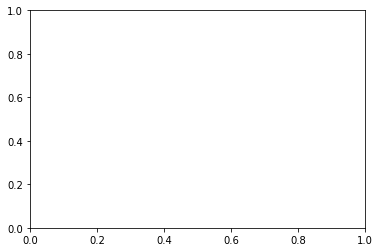

In [2]:
from matplotlib.pyplot import figure, show
fig = figure()
ax = fig.add_subplot(111)
ax.loglog(f, abs(Isc), linewidth=2)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Current (A/Hz)')
ax.grid(True)
show()